In [99]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
%matplotlib inline
plt.style.use('ggplot')

In [34]:
elo_ranking = pd.read_csv('elo_ranking.csv')

elo_ranking['date'] =  pd.to_datetime(elo_ranking['date'], format='%Y-%m-%d')
elo_ranking = elo_ranking.drop(['Unnamed: 0'], axis=1)
elo_ranking.tail(2)

,team,elo,date
78258,India,1442.537649,2018-06-04
78259,Kenya,1485.630351,2018-06-04


In [41]:
fifa_ranking = pd.read_csv('daily_fifa_ranking.csv')
fifa_ranking['date'] =  pd.to_datetime(fifa_ranking['date'], format='%Y-%m-%d')
fifa_ranking = fifa_ranking.drop(["Unnamed: 0"], axis=1)
fifa_ranking.tail(2)

,date,country,rank,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation
1954621,2018-05-16,Gibraltar,196.0,GIB,34.16,0.0,10.0,34.16,34.16,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
1954622,2018-05-17,Gibraltar,196.0,GIB,34.16,34.0,0.0,34.16,34.16,0.0,0.0,0.0,0.0,0.0,0.0,UEFA


In [43]:
rank_data = pd.merge(fifa_ranking, elo_ranking, how='inner', left_on=['date','country'], right_on = ['date','team'])[["date", "elo", "total_points", "team"]]
rank_data.tail()

,date,elo,total_points,team
39759,2017-08-31,1262.355202,0.0,Gibraltar
39760,2017-09-03,1257.673246,0.0,Gibraltar
39761,2017-10-07,1245.460473,0.0,Gibraltar
39762,2017-10-10,1240.152586,0.0,Gibraltar
39763,2018-03-25,1261.764273,0.0,Gibraltar


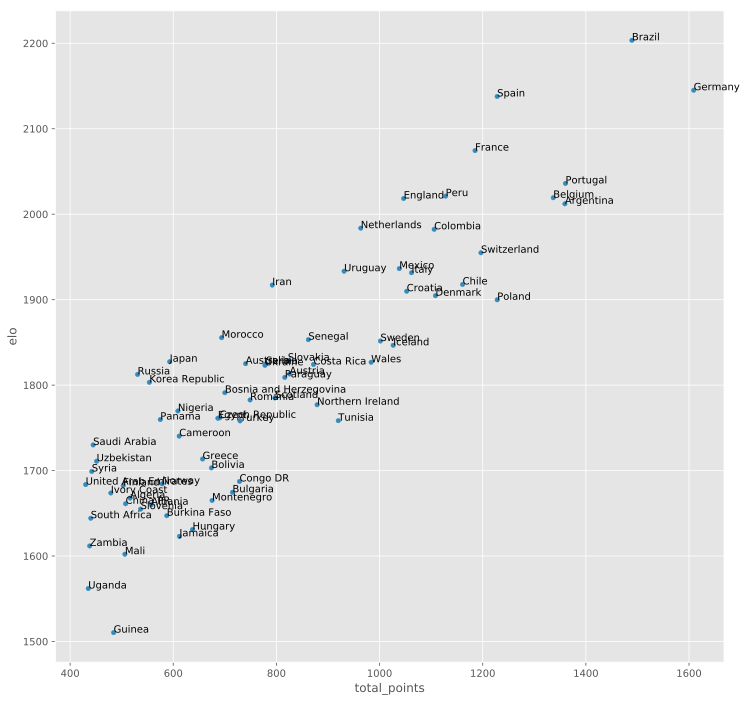

In [100]:
last = rank_data[rank_data["date"] > "2018-01-01"].groupby("team").last()
last = last.sort_values(by=['total_points'], ascending=False)
last = last.head(70)
ax = last.plot.scatter(x="total_points", y="elo", figsize=(12, 12))
for i, team in enumerate(last.index.values):
    ax.annotate(team, (last["total_points"].iloc[i], last["elo"].iloc[i]))

In [120]:
player_stats = pd.read_csv('player_ranks_summary.csv')
player_stats = player_stats.drop(['Unnamed: 0'], axis=1)
player_stats.tail()

,NATIONALITY,rating,rating_max,rating_min,pace,pace_max,pace_min,shooting,shooting_max,shooting_min,...,dribbling,dribbling_max,dribbling_min,defending,defending_max,defending_min,physical,physical_max,physical_min,year
1134,Tunisia,72.157895,82,68,72.157895,82,32,62.315789,86,33,...,68.736842,83,45,44.421053,77,24,72.157895,82,38,2018
1135,Uganda,63.900000,71,71,63.900000,63,63,52.200000,58,58,...,57.600000,64,64,61.200000,68,68,63.900000,76,76,2018
1136,Uzbekistan,67.200000,80,71,67.200000,88,64,55.200000,78,51,...,63.600000,75,66,55.500000,79,38,67.200000,79,66,2018
1137,Zambia,63.900000,73,69,63.900000,91,70,49.200000,67,35,...,59.700000,75,52,45.600000,70,36,63.900000,71,61,2018
1138,Zimbabwe,66.085714,84,69,66.085714,90,69,55.028571,75,33,...,64.157143,82,62,48.600000,85,21,66.085714,89,54,2018


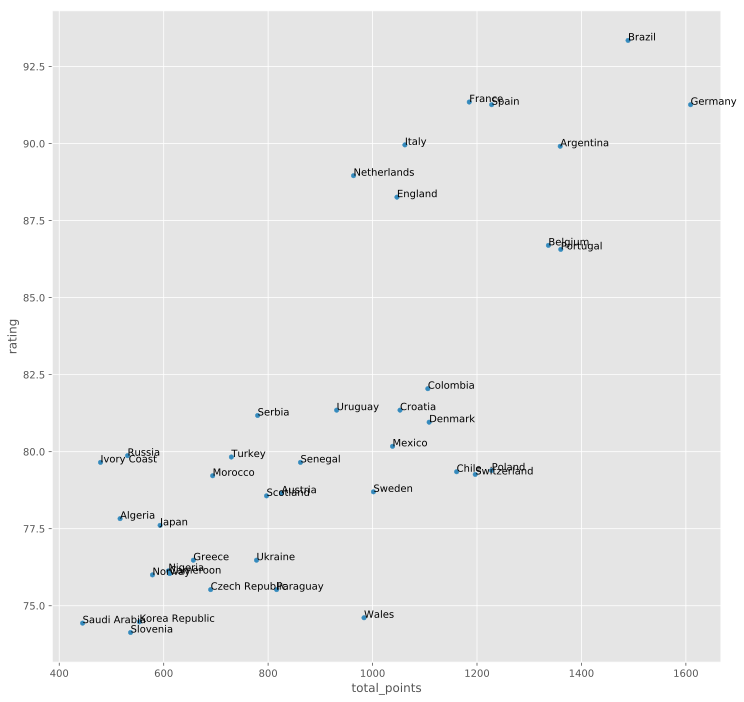

In [121]:
rank_data["year"] = rank_data["date"].dt.year

rank_with_player = pd.merge(rank_data, player_stats, how='inner', left_on=['year', 'team'], right_on = ['year','NATIONALITY'])

last = rank_with_player[rank_with_player["year"] > 2017].groupby("team").last()
last = last.sort_values(by=['rating'], ascending=False)
last = last.head(40)
ax = last.plot.scatter(x="total_points", y="rating", figsize=(12, 12))
for i, team in enumerate(last.index.values):
    ax.annotate(team, (last["total_points"].iloc[i], last["rating"].iloc[i]))

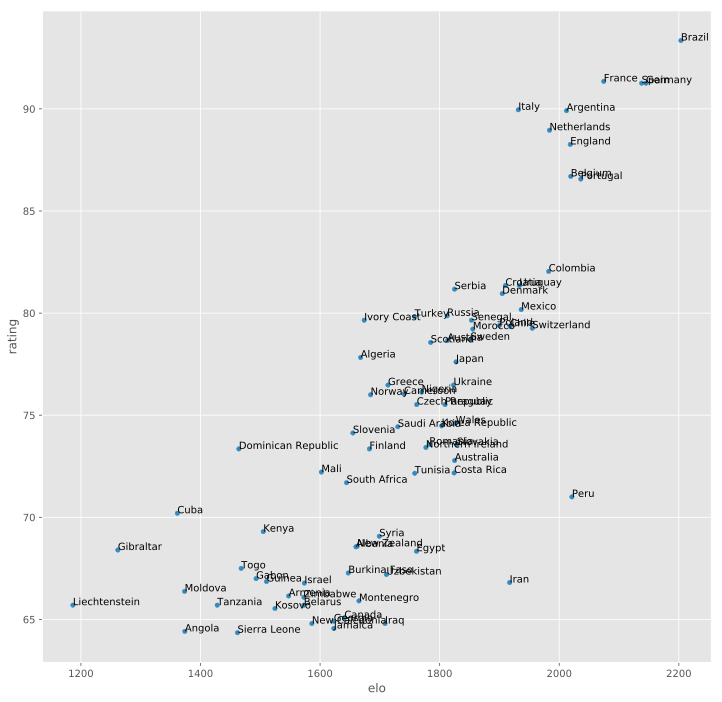

In [123]:
rank_data["year"] = rank_data["date"].dt.year

rank_with_player = pd.merge(rank_data, player_stats, how='inner', left_on=['year', 'team'], right_on = ['year','NATIONALITY'])

last = rank_with_player[rank_with_player["year"] > 2017].groupby("team").last()
last = last.sort_values(by=['rating'], ascending=False)
last = last.head(80)
ax = last.plot.scatter(x="elo", y="rating", figsize=(12, 12))
for i, team in enumerate(last.index.values):
    ax.annotate(team, (last["elo"].iloc[i], last["rating"].iloc[i]))

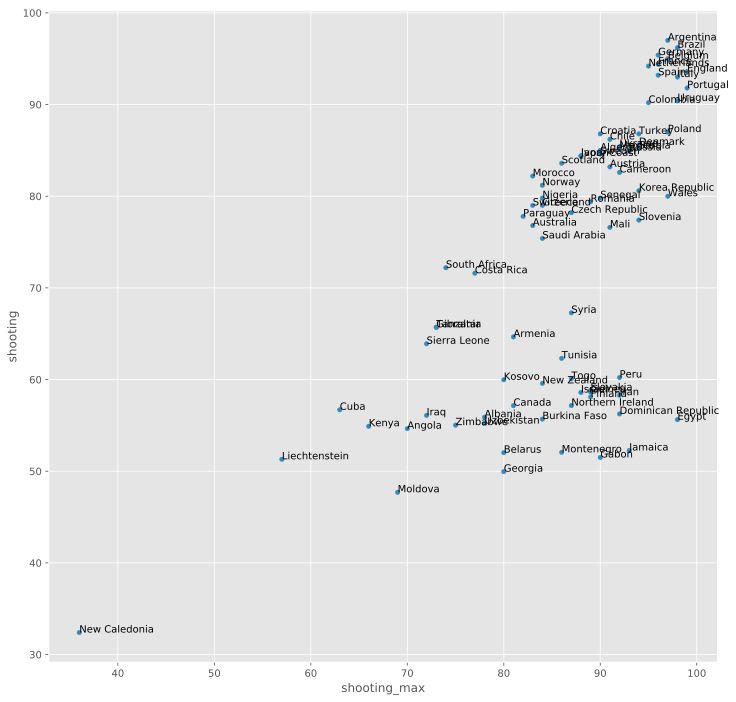

In [130]:
last = rank_with_player[rank_with_player["year"] > 2017].groupby("team").last()
last = last.sort_values(by=['rating'], ascending=False)
last = last.head(80)
ax = last.plot.scatter(x="shooting_max", y="shooting", figsize=(12, 12))
for i, team in enumerate(last.index.values):
    ax.annotate(team, (last["shooting_max"].iloc[i], last["shooting"].iloc[i]))